In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.float_format = '{:,.2f}'.format

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.00",3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,"538,000.00",3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,"180,000.00",2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,"604,000.00",4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,"510,000.00",3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,"360,000.00",3,2.50,1530,1131,3.00,0,0,...,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,20150223T000000,"400,000.00",4,2.50,2310,5813,2.00,0,0,...,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,20140623T000000,"402,101.00",2,0.75,1020,1350,2.00,0,0,...,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,20150116T000000,"400,000.00",3,2.50,1600,2388,2.00,0,0,...,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


In [5]:
df.drop('id', axis=1, inplace=True)

In [6]:
df['sqft_yard'] = df['sqft_lot'] - df['sqft_living']
df['sqft_yard15'] = df['sqft_lot15'] - df['sqft_living15']

In [7]:
df['price_per_sqft'] = df['price'] / df['sqft_lot']

In [8]:
df['norm_price'] = (df["price"] - df['price'].min()) / (df['price'].max() - df['price'].min()) # min-max normalization

In [9]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_yard,sqft_yard15,price_per_sqft,norm_price
0,20141013T000000,"221,900.00",3,1.00,1180,5650,1.00,0,0,3,...,0,98178,47.51,-122.26,1340,5650,4470,4310,39.27,0.02
1,20141209T000000,"538,000.00",3,2.25,2570,7242,2.00,0,0,3,...,1991,98125,47.72,-122.32,1690,7639,4672,5949,74.29,0.06
2,20150225T000000,"180,000.00",2,1.00,770,10000,1.00,0,0,3,...,0,98028,47.74,-122.23,2720,8062,9230,5342,18.00,0.01
3,20141209T000000,"604,000.00",4,3.00,1960,5000,1.00,0,0,5,...,0,98136,47.52,-122.39,1360,5000,3040,3640,120.80,0.07
4,20150218T000000,"510,000.00",3,2.00,1680,8080,1.00,0,0,3,...,0,98074,47.62,-122.05,1800,7503,6400,5703,63.12,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,"360,000.00",3,2.50,1530,1131,3.00,0,0,3,...,0,98103,47.70,-122.35,1530,1509,-399,-21,318.30,0.04
21609,20150223T000000,"400,000.00",4,2.50,2310,5813,2.00,0,0,3,...,0,98146,47.51,-122.36,1830,7200,3503,5370,68.81,0.04
21610,20140623T000000,"402,101.00",2,0.75,1020,1350,2.00,0,0,3,...,0,98144,47.59,-122.30,1020,2007,330,987,297.85,0.04
21611,20150116T000000,"400,000.00",3,2.50,1600,2388,2.00,0,0,3,...,0,98027,47.53,-122.07,1410,1287,788,-123,167.50,0.04


In [10]:
bins = [0, 0.1, 0.3, 0.4, 0.5, 1]
labels = ['Very Cheap', 'Cheap', 'Medium', 'High', 'Very High']

df['cost_type'] = pd.cut(df['norm_price'], bins=bins, labels=labels, include_lowest=True) # divides price into categories
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_yard,sqft_yard15,price_per_sqft,norm_price,cost_type
0,20141013T000000,"221,900.00",3,1.00,1180,5650,1.00,0,0,3,...,98178,47.51,-122.26,1340,5650,4470,4310,39.27,0.02,Very Cheap
1,20141209T000000,"538,000.00",3,2.25,2570,7242,2.00,0,0,3,...,98125,47.72,-122.32,1690,7639,4672,5949,74.29,0.06,Very Cheap
2,20150225T000000,"180,000.00",2,1.00,770,10000,1.00,0,0,3,...,98028,47.74,-122.23,2720,8062,9230,5342,18.00,0.01,Very Cheap
3,20141209T000000,"604,000.00",4,3.00,1960,5000,1.00,0,0,5,...,98136,47.52,-122.39,1360,5000,3040,3640,120.80,0.07,Very Cheap
4,20150218T000000,"510,000.00",3,2.00,1680,8080,1.00,0,0,3,...,98074,47.62,-122.05,1800,7503,6400,5703,63.12,0.06,Very Cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,"360,000.00",3,2.50,1530,1131,3.00,0,0,3,...,98103,47.70,-122.35,1530,1509,-399,-21,318.30,0.04,Very Cheap
21609,20150223T000000,"400,000.00",4,2.50,2310,5813,2.00,0,0,3,...,98146,47.51,-122.36,1830,7200,3503,5370,68.81,0.04,Very Cheap
21610,20140623T000000,"402,101.00",2,0.75,1020,1350,2.00,0,0,3,...,98144,47.59,-122.30,1020,2007,330,987,297.85,0.04,Very Cheap
21611,20150116T000000,"400,000.00",3,2.50,1600,2388,2.00,0,0,3,...,98027,47.53,-122.07,1410,1287,788,-123,167.50,0.04,Very Cheap


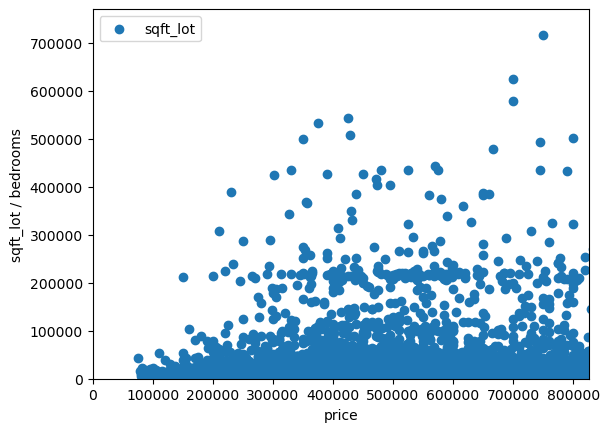

In [11]:
price = df['price']
sqft_lot = df['sqft_lot']
bedrooms = df['bedrooms']

plt.scatter(price, sqft_lot, label='sqft_lot')
#plt.scatter(price, bedrooms, label='bedrooms')
plt.ylabel('sqft_lot / bedrooms')
plt.xlabel('price')
plt.legend()

# Set the limits for the x-axis and y-axis
x_max = max(max(sqft_lot), max(bedrooms))
y_max = max(price)
x_limit = x_max / 2
y_limit = y_max / 10

plt.xlim(0, x_limit)
plt.ylim(0, y_limit)

plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1

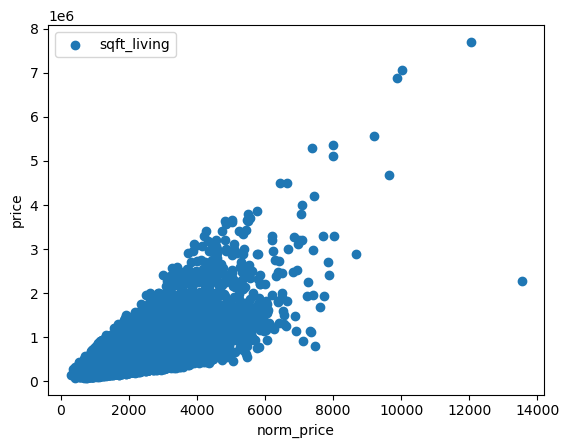

In [12]:
import numpy as np

norm_price = df['norm_price']
price = df['price']
sqft_living = df['sqft_living']

plt.scatter(sqft_living, price, label='sqft_living')
plt.xlabel('norm_price')
plt.ylabel('price')
plt.legend()

# Perform linear regression using numpy
x = norm_price.values.reshape(-1, 1)
y = price.values.reshape(-1, 1)
coefficients = np.linalg.inv(x.T @ x) @ x.T @ y

# Generate the predicted values for the regression line
x_regression = np.linspace(x.min(), x.max(), 100)
y_regression = coefficients[0] * x_regression + coefficients[1]

# Plot the linear regression line
plt.plot(x_regression, y_regression, color='red', label='Linear Regression')

# Display the plot with the regression line
plt.legend()
plt.show()

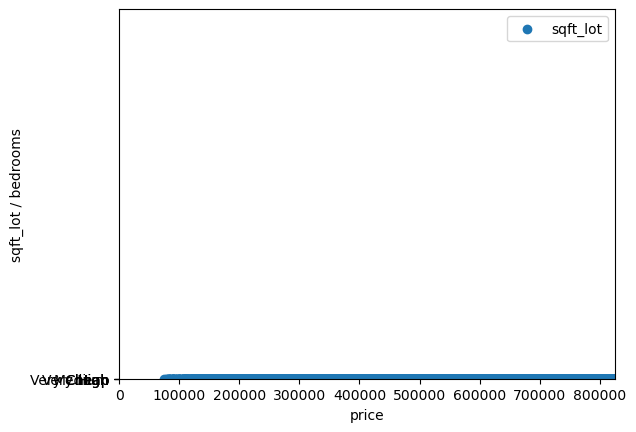

In [13]:
price = df['price']
cost_type = df['cost_type']

plt.scatter(price, cost_type, label='sqft_lot')
#plt.scatter(price, bedrooms, label='bedrooms')
plt.ylabel('sqft_lot / bedrooms')
plt.xlabel('price')
plt.legend()

# Set the limits for the x-axis and y-axis
x_max = max(max(sqft_lot), max(bedrooms))
y_max = max(price)
x_limit = x_max / 2
y_limit = y_max / 10

plt.xlim(0, x_limit)
plt.ylim(0, y_limit)

plt.show()

In [15]:
df.to_csv('housing_updated.csv', encoding='utf-8', index=False)